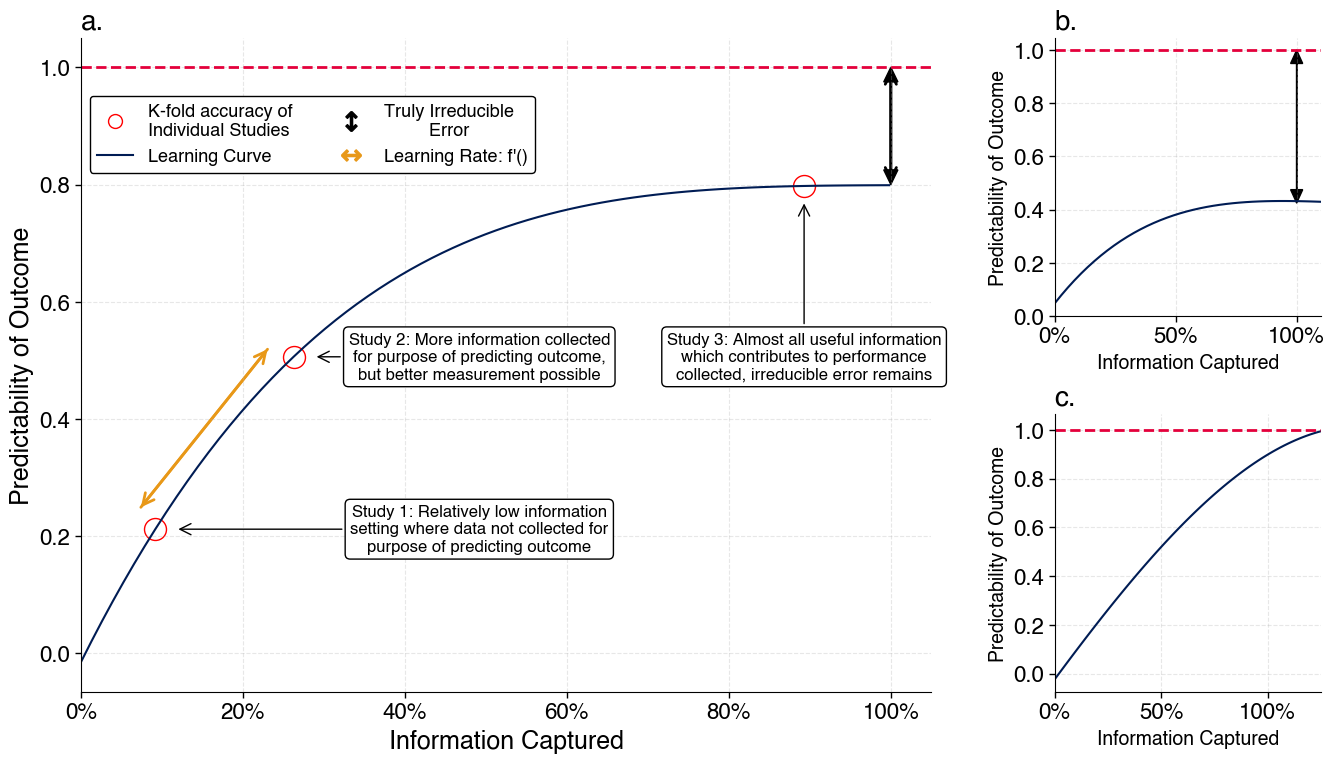

In [13]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from scipy.optimize import curve_fit
import matplotlib.patches as patches

mpl.rcParams['font.family'] = 'Helvetica'
warnings.simplefilter("ignore", UserWarning)

def polynomial_function(x, *coefficients):
    degree = len(coefficients) - 1
    y = np.zeros_like(x)
    for i, coeff in enumerate(coefficients):
        y += coeff * x**(degree - i)
    return y

fig = plt.figure(figsize=(16,8.5))
gs = gridspec.GridSpec(2, 32, hspace=.35)
ax1 = fig.add_subplot(gs[:, :22])
ax2 = fig.add_subplot(gs[0, 25:32])
ax3 = fig.add_subplot(gs[1, 25:32])

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_data = np.array([0, 0.2, 0.4, 0.6, 0.65, 0.7, 0.75, 0.775, 0.8, 0.8, 0.8, 0.8, 0.8])
degree = 4
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)

ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='-')
ax1.scatter(x1_fit[7], y1_fit[7], color='w', edgecolor='r', s=[250], alpha=1, marker='o')
ax1.scatter(x1_fit[20], y1_fit[20], color='w', edgecolor='r', s=[250], alpha=1, marker='o')
ax1.scatter(x1_fit[68], y1_fit[68], color='w', edgecolor='r', s=[250], alpha=1, marker='o')

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
y_data = np.array([0, 0.2, 0.25, 0.3, 0.35, 0.375, 0.4, 0.41, 0.42, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425])
degree = 4
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(0, max(x_data) + 1, 100)
y_fit = polynomial_function(x_fit, *params)
ax2.plot(x_fit, y_fit, color='#001c54', linestyle='-')



x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])
y_data = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995])
degree = 3
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(0, max(x_data) + 1, 100)
y_fit = polynomial_function(x_fit, *params)
ax3.plot(x_fit, y_fit, color='#001c54', linestyle='-')



for title, ax in zip(['a.', 'b.', 'c.'], [ax1, ax2, ax3]):
    ax.set_title(title, fontsize=20, loc='left')
    ax.grid(which="both", linestyle='--', alpha=0.3)
    ax.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
    ax.axhline(y=1, color='#E4003B', linestyle='--', linewidth=2)


ax1.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
for ax in [ax2, ax3]:
    ax.set_xticklabels(['0%', '50%', '100%'])
    ax.set_ylabel('Predictability of Outcome', fontsize=14)
    ax.set_xlabel('Information Captured', fontsize=14)    
ax1.set_ylabel('Predictability of Outcome', fontsize=18)
ax1.set_xlabel('Information Captured', fontsize=18)    
   
arrow1 = patches.FancyArrowPatch(
    (10, 0.8), (10, 1), 
    mutation_scale=20,
    color='k', 
    arrowstyle='->',
    linewidth=2
)

arrow2 = patches.FancyArrowPatch(
    (10, 1), (10, 0.8), 
    mutation_scale=20,
    color='k', 
    arrowstyle='->', 
    linewidth=2
)

arrow3 = patches.FancyArrowPatch(
    (x1_fit[7]-.2, y_fit[7]+.125), (x1_fit[20]-.3, y_fit[20]+.15), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)

arrow4 = patches.FancyArrowPatch(
    (x1_fit[20]-.3, y_fit[20]+.15), (x1_fit[7]-.2, y_fit[7]+.125), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)

ax1.add_patch(arrow1)
ax1.add_patch(arrow2)
ax1.add_patch(arrow3)
ax1.add_patch(arrow4)

ax1.set_xlim(0,10.5) 
ax2.set_xlim(0,11)
ax3.set_xlim(0,25)

ax1.arrow(10, .8, 0, .175, head_width=0.175, head_length=0.025, fc='k', ec='k')
ax1.arrow(10, 1, 0, -.175, head_width=0.175, head_length=0.025, fc='k', ec='k')
ax2.arrow(10, .425, 0, .525, head_width=0.5, head_length=0.05, fc='k', ec='k')
ax2.arrow(10, 1, 0, -.525, head_width=0.5, head_length=0.05, fc='k', ec='k')

ax1.annotate('Study 1: Relatively low information\nsetting where data not collected for\npurpose of predicting outcome',
             xy=(x1_fit[7]+.25, y1_fit[7]),
             xytext=(x1_fit[7]+4, y1_fit[7]),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
               )

ax1.annotate('Study 2: More information collected\nfor purpose of predicting outcome,\nbut better measurement possible',
             xy=(x1_fit[20]+.25, y1_fit[20]),
             xytext=(x1_fit[7]+4, y1_fit[20]),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
               )

ax1.annotate('Study 3: Almost all useful information\nwhich contributes to performance\ncollected, irreducible error remains',
             xy=(x1_fit[68], y1_fit[68]-.025),
             xytext=(x1_fit[68], y1_fit[20]),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
               )

legend_elements1 = [
    Line2D([0], [0],
           marker='o',
           color='#001c54',
           markerfacecolor='w',
           markeredgecolor='r',
           linewidth=0,
           markersize=10,
           label='K-fold accuracy of \nIndividual Studies'),
    Line2D([0], [0],
           color='#001c54',
           markeredgecolor='r',
           linewidth=1.5,
           markersize=10,
           label='Learning Curve'),
    Line2D([0], [0],
           color='k',
           linestyle='None',
           marker='$↕$',
           markersize=14,
           label='Truly Irreducible\n         Error'),
        Line2D([0], [0],
           color='#E89818',
           linestyle=None,
           lw=0,
           marker='$\leftrightarrow$',
           markersize=14,
           label="Learning Rate: f'()"
          )
]

ax1.legend(handles=legend_elements1,
           loc='upper left',
           bbox_to_anchor=(0, 0.925),  # Move the legend down
           frameon=True,
           fontsize=13,
           framealpha=1,
           facecolor='w',
           edgecolor=(0, 0, 0, 1),
           ncols=2
           )
sns.despine()
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure.pdf'),
                bbox_inches='tight')
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure.svg'),
                bbox_inches='tight')
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure.png'), dpi=800,
                bbox_inches='tight')